## Deskripsi proyek

Proyek ini bertujuan untuk mencari tahu perilaku pengguna aplikasi dari perusahaan startup yang menjual produk makanan dengan melihat jalur yang dilalui pengguna untuk mencapai ke tahap pembelian. Dan Mencari tahu font yang dapat memberikan hasil terbaik karena Tim web designer ingin mengubah font untuk keseluruhan aplikasi, keputusan diambil berdasarkan hasil A/A/B testing. Dua kelompok kontrol diperlihatkan dengan versi font lama dan satu kelompok uji diperlihatkan dengan versi font terbaru. Langkah-langkah yang akan dilakukan yaitu:

1. Memuat library yang dibutuhkan
2. Memuat datanya
3. Melakukan Pra-pemrosesan
4. Memeriksa data
5. Mempelajari corong peristiwa
4. Analisis hasil eksperimen
5. Kesimpulan

## Memuat Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import math

# Memuat data

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
data.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


## Pra-pemrosesan data

In [3]:
# mengubah nama kolom
data.rename(columns={
    'EventName' : 'event_name',
    'DeviceIDHash': 'user',
    'EventTimestamp' : 'timespent',
    'ExpId' : 'exp_id'}, inplace=True)
data.head()

,event_name,user,timespent,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   user        244126 non-null  int64 
 2   timespent   244126 non-null  int64 
 3   exp_id      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,user,timespent,exp_id
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


In [5]:
# menambakan kolom tanggal
data['timespent'] = pd.to_datetime(data['timespent'], unit='s')
data['date'] = data['timespent'].dt.floor('1D')
data.head(10)

,event_name,user,timespent,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
5,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248,2019-07-25
6,OffersScreenAppear,8351860793733343758,2019-07-25 14:50:42,246,2019-07-25
7,MainScreenAppear,5682100281902512875,2019-07-25 20:14:37,246,2019-07-25
8,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247,2019-07-25
9,MainScreenAppear,5407636962369102641,2019-07-26 03:35:12,246,2019-07-26


In [6]:
# mengubah tipe kolom user
data['user'] =data['user'].astype(str)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user        244126 non-null  object        
 2   timespent   244126 non-null  datetime64[ns]
 3   exp_id      244126 non-null  int64         
 4   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 9.3+ MB


Nama kolom sudah di sesuaikan, tidak ada nilai yang hilang, dan tipe data sudah sesuai

## Memeriksa data

In [8]:
data['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [9]:
event = len(data['event_name'])
users = len(data['user'].unique())
event_per_users = event / users
print(f'{event} peristiwa' )
print(f'{users} pengguna' )
print(f'{event_per_users} rata-rata peristiwa per pengguna' )

244126 peristiwa
7551 pengguna
32.33028737915508 rata-rata peristiwa per pengguna


Terdapat 7551 pengguna, 244126 peristiwa dan rata-rata peristiwa per pengguna adalah 32 peristiwa

In [10]:
# memeriksa tanggal minimum dan maksimum
data.date.min(), data.date.max()

(Timestamp('2019-07-25 00:00:00'), Timestamp('2019-08-07 00:00:00'))

<AxesSubplot:>

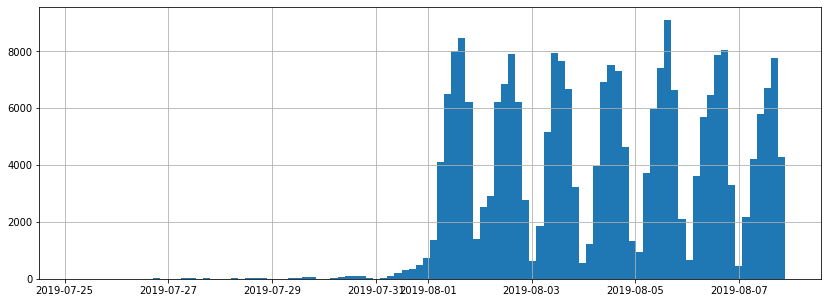

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters
data['timespent'].hist(bins=100, figsize=(14 ,5))

<AxesSubplot:xlabel='date'>

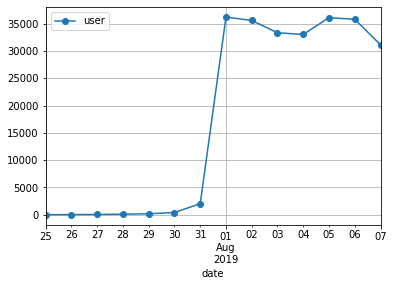

In [12]:
data.pivot_table(index='date', values='user', aggfunc='count').plot(style='o-', grid=True )

data pada tanggal 25 sampai 31 juli datanya hanya sedikit, oleh karena itu data pada tanggal tersebut akan diabaikan saja

In [13]:
data.query('timespent > "2019-07-31 21:00"', inplace=True)
data.head(10)

,event_name,user,timespent,exp_id,date
1990,MainScreenAppear,7701922487875823903,2019-07-31 21:00:57,247,2019-07-31
1991,MainScreenAppear,2539077412200498909,2019-07-31 21:01:45,247,2019-07-31
1992,OffersScreenAppear,3286987355161301427,2019-07-31 21:02:21,248,2019-07-31
1993,OffersScreenAppear,3187166762535343300,2019-07-31 21:02:23,247,2019-07-31
1994,MainScreenAppear,1118952406011435924,2019-07-31 21:03:25,248,2019-07-31
1995,MainScreenAppear,929387516286850088,2019-07-31 21:05:35,248,2019-07-31
1996,OffersScreenAppear,3511569580412335882,2019-07-31 21:06:12,246,2019-07-31
1997,OffersScreenAppear,3511569580412335882,2019-07-31 21:07:16,246,2019-07-31
1998,MainScreenAppear,7701922487875823903,2019-07-31 21:07:27,247,2019-07-31
1999,OffersScreenAppear,5039418296347449582,2019-07-31 21:07:34,246,2019-07-31


<AxesSubplot:>

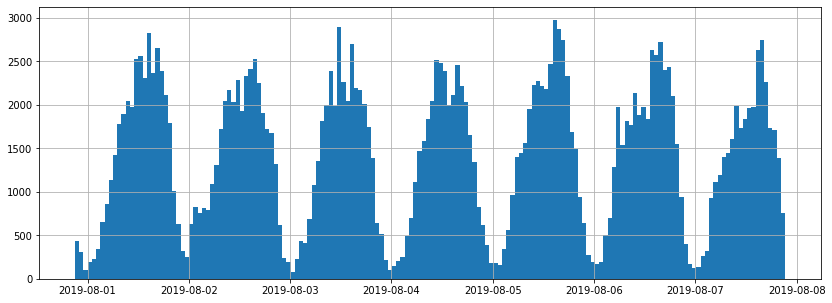

In [14]:
data['timespent'].hist(bins=7*24, figsize=(14 ,5))

In [15]:
event = len(data['event_name'])
users = len(data['user'].unique())
event_per_users = event / users
print(f'{event} peristiwa' )
print(f'{users} pengguna' )
print(f'{event_per_users} rata-rata peristiwa per pengguna' )

242136 peristiwa
7538 pengguna
32.12204828867073 rata-rata peristiwa per pengguna


terlihat perbedaan dari jumlah pengguna dan peristiwa setelah data yang diambil hanya dari tanggal 31 juli saja

In [16]:
data['exp_id'].value_counts()

248    85039
246    79679
247    77418
Name: exp_id, dtype: int64

## Mempelajari corong peristiwa

In [17]:
data.pivot_table(index='event_name', values='user', aggfunc='count').sort_values(by='user', ascending=False)

,user
event_name,
MainScreenAppear,117992
OffersScreenAppear,46548
CartScreenAppear,42406
PaymentScreenSuccessful,34146
Tutorial,1044


Terdapat 5 event, MainScreenAppear paling tinggi nilainya sedangkan tutorial yang paling sedikit.

In [18]:
# menghitung jumlah pengguna disetiap peristiwa
user_per_event = data.pivot_table(index='event_name', values='user', aggfunc= lambda x: x.nunique()).sort_values('user', ascending=False)
user_per_event

,user
event_name,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540
Tutorial,843


In [19]:
user_per_event / len(data['user'].unique())

,user
event_name,
MainScreenAppear,0.984744
OffersScreenAppear,0.609843
CartScreenAppear,0.495622
PaymentScreenSuccessful,0.469621
Tutorial,0.111833


Karena kolom tutorial jumlahnya hanya sedikit dan tidak hubungannya dengan setiap event yang lain maka kolom tutorial di abaikan saja

In [20]:
# konversi pengguna tiap event
users_funnel = user_per_event[:-1]
users_funnel = (users_funnel / users_funnel.shift())[1:]
users_funnel

,user
event_name,
OffersScreenAppear,0.619291
CartScreenAppear,0.812704
PaymentScreenSuccessful,0.947537


Pada tahap awal yaitu pada hatap main screen appear ke tahap offers screen appear adalah tahap yang paling banyak persentase kehilangan pengguna, hal ini perlu ditinjau kembali agar persentase kehilangan pengguna ditahap awal tidak terlalu signifikan

In [21]:
print('{} pengguna yang berhasil menyelesaikan tahap awal hingga pembayaran '
      .format((user_per_event.loc['PaymentScreenSuccessful']/user_per_event.loc['MainScreenAppear'])['user']))

0.47689613363869054 pengguna yang berhasil menyelesaikan tahap awal hingga pembayaran 


## Analisis hasil eksprimen

In [22]:
users_per_group= data.pivot_table(index='exp_id', values='user', aggfunc=lambda x : x.nunique())
users_per_group

,user
exp_id,
246,2484
247,2517
248,2537


In [23]:
users_events_per_group = data.pivot_table(index='event_name', values='user', columns='exp_id',
                                         aggfunc=lambda x : x.nunique())
users_events_per_group

exp_id,246,247,248
event_name,,,
CartScreenAppear,1266,1239,1231
MainScreenAppear,2450,2479,2494
OffersScreenAppear,1542,1524,1531
PaymentScreenSuccessful,1200,1158,1182
Tutorial,278,284,281


<AxesSubplot:xlabel='event_name'>

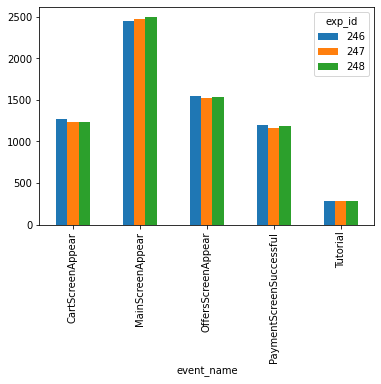

In [40]:
users_events_per_group.plot(kind='bar')

In [24]:
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):
    # proporsi keberhasilan pada grup pertama:
    p1= successes1/trials1
    
    # proporsi keberhasilan pada grup ke 2:
    p2= successes2/trials2
    
    # proporsi keberhasilan pada gabunga dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    
    # perbedaan proporsi dataset:
    difference = p1-p2
    
    # meneghitung statistik standar deviasi dan distribusi normal:
    z_value = difference / math.sqrt(p_combined * (1- p_combined) * (1/trials1 + 1/trials2))
    
    # setting standar distribusi normal (mean=0, standar deviasi=1):
    distr = stats.norm(0, 1)
  
    p_value = (1-distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', p_value)
    
    if (p_value < alpha):
        print("tolak null hypothesis : ada perbedaan proporsi yang signifikan antara kelompok")
    else:
        print("gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok")

In [42]:
check_hypothesis(users_events_per_group.loc['MainScreenAppear', 246],
                 users_events_per_group.loc['MainScreenAppear', 247],
                 users_per_group.loc[246],
                 users_per_group.loc[247])

p-value:  [0.67562177]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok


Hasil hipotesis menunjukan bahwa tidak ada perbedaan antar kelompok signifikan secara statistik

In [26]:
def check_event_hypothesis(users_events_per_group, users_per_group, 
                           event, 
                           exp1, exp2
                          ):
    frac1 = users_events_per_group.loc[event, exp1] / users_per_group.loc[exp1]
    frac2 = users_events_per_group.loc[event, exp2] / users_per_group.loc[exp2]
    print(f'{frac1} with {event} event in group {exp1}')
    print(f'{frac2} with {event} event in group {exp2}')
    check_hypothesis(users_events_per_group.loc[event, exp1],
                     users_events_per_group.loc[event, exp2],
                    users_per_group.loc[exp1],
                    users_per_group.loc[exp2])

In [27]:
for event in users_events_per_group.index:
    check_event_hypothesis(users_events_per_group, users_per_group,
                           event, 246, 247)
    print()

user    0.509662
Name: 246, dtype: float64 with CartScreenAppear event in group 246
user    0.492253
Name: 247, dtype: float64 with CartScreenAppear event in group 247
p-value:  [0.21828121]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.986312
Name: 246, dtype: float64 with MainScreenAppear event in group 246
user    0.984903
Name: 247, dtype: float64 with MainScreenAppear event in group 247
p-value:  [0.67562177]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.620773
Name: 246, dtype: float64 with OffersScreenAppear event in group 246
user    0.605483
Name: 247, dtype: float64 with OffersScreenAppear event in group 247
p-value:  [0.26698769]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.483092
Name: 246, dtype: float64 with PaymentScreenSuccessful event in group 246
user    0.460072
Name: 247, dtype: float64 with PaymentScre

pada semua peristiwa p-valuenya yaitu diatas 0.05 yang artinya tidak ada perbedaan proporsi yang signifikan di tiap kelompok kontrol antara 246 dan 247

In [28]:
for event in users_events_per_group.index:
    check_event_hypothesis(users_events_per_group, users_per_group,
                           event, 246, 248)
    print()

user    0.509662
Name: 246, dtype: float64 with CartScreenAppear event in group 246
user    0.485219
Name: 248, dtype: float64 with CartScreenAppear event in group 248
p-value:  [0.08328413]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.986312
Name: 246, dtype: float64 with MainScreenAppear event in group 246
user    0.983051
Name: 248, dtype: float64 with MainScreenAppear event in group 248
p-value:  [0.34705881]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.620773
Name: 246, dtype: float64 with OffersScreenAppear event in group 246
user    0.603469
Name: 248, dtype: float64 with OffersScreenAppear event in group 248
p-value:  [0.20836205]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.483092
Name: 246, dtype: float64 with PaymentScreenSuccessful event in group 246
user    0.465905
Name: 248, dtype: float64 with PaymentScre

rata-rata dikelompok uji tidak ada perbedaan yang signifikan dengan kelompok kontorl 246 terhadap kelompok uji 258

In [29]:
for event in users_events_per_group.index:
    check_event_hypothesis(users_events_per_group, users_per_group,
                           event, 247, 248)
    print()

user    0.492253
Name: 247, dtype: float64 with CartScreenAppear event in group 247
user    0.485219
Name: 248, dtype: float64 with CartScreenAppear event in group 248
p-value:  [0.61695175]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.984903
Name: 247, dtype: float64 with MainScreenAppear event in group 247
user    0.983051
Name: 248, dtype: float64 with MainScreenAppear event in group 248
p-value:  [0.60016616]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.605483
Name: 247, dtype: float64 with OffersScreenAppear event in group 247
user    0.603469
Name: 248, dtype: float64 with OffersScreenAppear event in group 248
p-value:  [0.88359567]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.460072
Name: 247, dtype: float64 with PaymentScreenSuccessful event in group 247
user    0.465905
Name: 248, dtype: float64 with PaymentScre

Hal yang sama terjadi juga pada kelompok kontrol 247, tidak ada yang perbedaan yang signifikan terhadap kelompok uji 248

In [30]:
# menggabungkan kelompok kontrol 246 dan 247, dibandingkan dengan 248
users_events_per_group_control = users_events_per_group.copy()
users_events_per_group_control.loc[:, 247] += users_events_per_group_control.loc[:, 246]
users_events_per_group_control.drop(columns=246, inplace=True)
users_events_per_group_control

exp_id,247,248
event_name,,
CartScreenAppear,2505,1231
MainScreenAppear,4929,2494
OffersScreenAppear,3066,1531
PaymentScreenSuccessful,2358,1182
Tutorial,562,281


In [31]:
# menggabungkan kelompok kontrol 246 dan 247, dibandingkan dengan 248
users_per_group_control = users_per_group.copy()
users_per_group_control.loc[247] += users_per_group_control.loc[246]
users_per_group_control.drop(246, inplace=True)
users_per_group_control

,user
exp_id,
247,5001
248,2537


In [32]:
# A/B testing antara gabungan kelompok kontrol dengan kelompok uji
for event in users_events_per_group.index:
    check_event_hypothesis(users_events_per_group_control, users_per_group_control,
                           event, 247, 248)
    print()

user    0.5009
Name: 247, dtype: float64 with CartScreenAppear event in group 247
user    0.485219
Name: 248, dtype: float64 with CartScreenAppear event in group 248
p-value:  [0.19819341]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.985603
Name: 247, dtype: float64 with MainScreenAppear event in group 247
user    0.983051
Name: 248, dtype: float64 with MainScreenAppear event in group 248
p-value:  [0.39298915]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.613077
Name: 247, dtype: float64 with OffersScreenAppear event in group 247
user    0.603469
Name: 248, dtype: float64 with OffersScreenAppear event in group 248
p-value:  [0.41899828]
gagal tolak null hypothesis: tidak ada perbedaan proporsi yang signifikan antara kelompok

user    0.471506
Name: 247, dtype: float64 with PaymentScreenSuccessful event in group 247
user    0.465905
Name: 248, dtype: float64 with PaymentScreen

Dari segi berapa jumlah user yang masuk ketiap event atau tiap screen hasilnya yaitu tidak ada perubahan yang signifikan antara kelompok uji dengan kelompok kontrol. 

## Kesimpulan

Berdasarkan hasil pengolahan data pada perusahaan startup produk makanan dapat diambil kesimpulannya yaitu, pada tahap awal yaitu  ditahap main screen appear ke tahap offers screen appear adalah tahap yang paling banyak persentase kehilangan pengguna, hal ini perlu ditinjau kembali agar dapat menarik pengguna lebih banyak hingga ketahap payment agar persentase kehilangan pengguna ditahap awal tidak terlalu berkurang secara signifikan.

Dan jumlah banyaknya pengguna dari semua exp_id tahap awal MainScreenAppear hingga PaymentScreenSuccessful tidak menunjukan perbedaan yang signifikan, hanya saja pada ke 3 exp_id dari tahap MainScreenAppear ke tahap OffersScreenAppear banyak berkurang, tetapi perbedaannya pada ke 3 exp_id rata-rata jumlahnya tidak terlalu signifikan. artinya perubahan font pada keseluruhan aplikasi tidak begitu mempengaruhi atau mengganggu pengguna pada saat menggunkana aplikasi tersebut.
